In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
mort = pd.read_csv('./data.csv', header=0) # data about mortgage
mort.head()

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,OUTCOME,State,Median_state_inc,UPB>Appraisal
0,37,75650.0,85,669,N,1707,6000,169000,160000,0.284500,Active,non-default,FL,"40,171",0
1,46,390775.0,102,684,N,0,5025,310000,309000,0.000000,Pay-off,non-default,NY,"44,228",1
2,30,112500.0,90,662,Y,1812,4800,177000,176450,0.377500,Pay-off,non-default,CA,"49,894",0
3,24,85250.0,97,647,N,3395,6934,113000,110000,0.489616,Pay-off,non-default,GA,"43,217",0
4,35,114000.0,100,791,N,3801,5504,103000,103000,0.690589,Pay-off,non-default,NH,"57,352",1


## 결측치 찾기

In [3]:
# find missing data
mort.isnull().sum()

Bo_Age                0
Ln_Orig               0
Orig_LTV_Ratio_Pct    0
Credit_score          0
First_home            0
Tot_mthly_debt_exp    0
Tot_mthly_incm        0
orig_apprd_val_amt    0
pur_prc_amt           0
DTI Ratio             0
Status                0
OUTCOME               0
State                 0
Median_state_inc      0
UPB>Appraisal         0
dtype: int64

## Firest_home 특성 데이터 전처리

In [4]:
## First_home 문자형 데이터 변환
mort['First_home'] = np.where(mort['First_home']=='Y',1,0)
mort['First_home']

0        0
1        0
2        1
3        0
4        0
        ..
10602    1
10603    0
10604    1
10605    1
10606    1
Name: First_home, Length: 10607, dtype: int32

## Status 특성 데이터 전처리

In [5]:
## Status 데이터 변환
mort['Status'] = np.where(mort['Status']=='Active',0, mort['Status']) # Active = 0
mort['Status'] = np.where(mort['Status']=='Default',1, mort['Status']) # Default = 1
mort['Status'] = np.where(mort['Status']=='Pay-off',2, mort['Status']) # Pay-off = 2
print(mort['Status'])
print('Status', np.unique(mort['Status']))

st = pd.get_dummies(mort[['Status']])
print(st)

0        0
1        2
2        2
3        2
4        2
        ..
10602    2
10603    2
10604    2
10605    0
10606    0
Name: Status, Length: 10607, dtype: object
Status [0 1 2]
       Status_0  Status_1  Status_2
0             1         0         0
1             0         0         1
2             0         0         1
3             0         0         1
4             0         0         1
...         ...       ...       ...
10602         0         0         1
10603         0         0         1
10604         0         0         1
10605         1         0         0
10606         1         0         0

[10607 rows x 3 columns]


In [6]:
# column 추가
mort['Status_Active'] = np.nan
mort['Status_Default'] = np.nan
mort['Status_Payoff'] = np.nan
for k0 in range(0,10607):
    mort.Status_Active[k0] = int(st['Status_0'][k0])
for k1 in range(0,10607):
    mort.Status_Default[k1] = int(st['Status_1'][k1])
for k2 in range(0,10607):
    mort.Status_Payoff[k2] = int(st['Status_2'][k2])

mort

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,OUTCOME,State,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,0,non-default,FL,"40,171",0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,2,non-default,NY,"44,228",1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,2,non-default,CA,"49,894",0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,2,non-default,GA,"43,217",0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,2,non-default,NH,"57,352",1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,2,non-default,AZ,"42,590",1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,2,non-default,IL,"45,787",0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,2,non-default,GA,"43,217",0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,0,non-default,FL,"40,171",1,1.0,0.0,0.0


In [7]:
## 필요없는 열 제거
del mort['Status']
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,State,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,non-default,FL,"40,171",0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,non-default,NY,"44,228",1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,non-default,CA,"49,894",0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,non-default,GA,"43,217",0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,non-default,NH,"57,352",1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,non-default,AZ,"42,590",1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,non-default,IL,"45,787",0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,non-default,GA,"43,217",0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,non-default,FL,"40,171",1,1.0,0.0,0.0


## OUTCOME 특성 데이터 전처리

In [8]:
## OUTCOME 데이터 변환
mort['OUTCOME'] = np.where(mort['OUTCOME']=='non-default',0,1) # non-default = 0, default = 1
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,State,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,0,FL,"40,171",0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,0,NY,"44,228",1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,0,CA,"49,894",0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,0,GA,"43,217",0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,0,NH,"57,352",1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,0,AZ,"42,590",1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,0,IL,"45,787",0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,0,GA,"43,217",0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,0,FL,"40,171",1,1.0,0.0,0.0


## Median_state_inc 특성 데이터 전처리

In [9]:
## string 타입을 정수로 변환하기
for k in range(0,10607):
    mort.Median_state_inc[k] = np.float64(mort.Median_state_inc[k].replace(",", ""))
    # print(mort.Median_state_inc[k]) <-- 확인용

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## State 특성 데이터 전처리

In [10]:
sta = mort[['State']].values
print(sta)

[['FL']
 ['NY']
 ['CA']
 ...
 ['GA']
 ['FL']
 ['TX']]


In [11]:
## State 특성 one hot encoding을 이용한 데이터 전처리
# 데이터 셋에서 필요한 부분들을 숫자로 변경
from sklearn import preprocessing
color_le = preprocessing.LabelEncoder() # 원핫인코딩을 위해 string을 int라벨을 변환함
sta = color_le.fit_transform(sta)
print(sta)

[ 9 34  4 ... 10  9 43]


c:\anaconda3\envs\dm2019\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
sta_np = np.array(sta).reshape(-1,1)
sta_np

array([[ 9],
       [34],
       [ 4],
       ...,
       [10],
       [ 9],
       [43]])

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe = ohe.fit_transform(sta_np).toarray() # 원핫인코딩으로 명목변수 변경 후 numpy로 변경
print(ohe)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
## mort 데이터셋에 넣기
for k in range(0,10607):
    mort['State'][k] = ohe[k]
mort

In [14]:
del mort['State']
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,0,40171,0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,0,44228,1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,0,49894,0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,0,43217,0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,0,57352,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,0,42590,1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,0,45787,0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,0,43217,0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,0,40171,1,1.0,0.0,0.0


## Correlation Heatmap

In [15]:
cor = mort.corr()

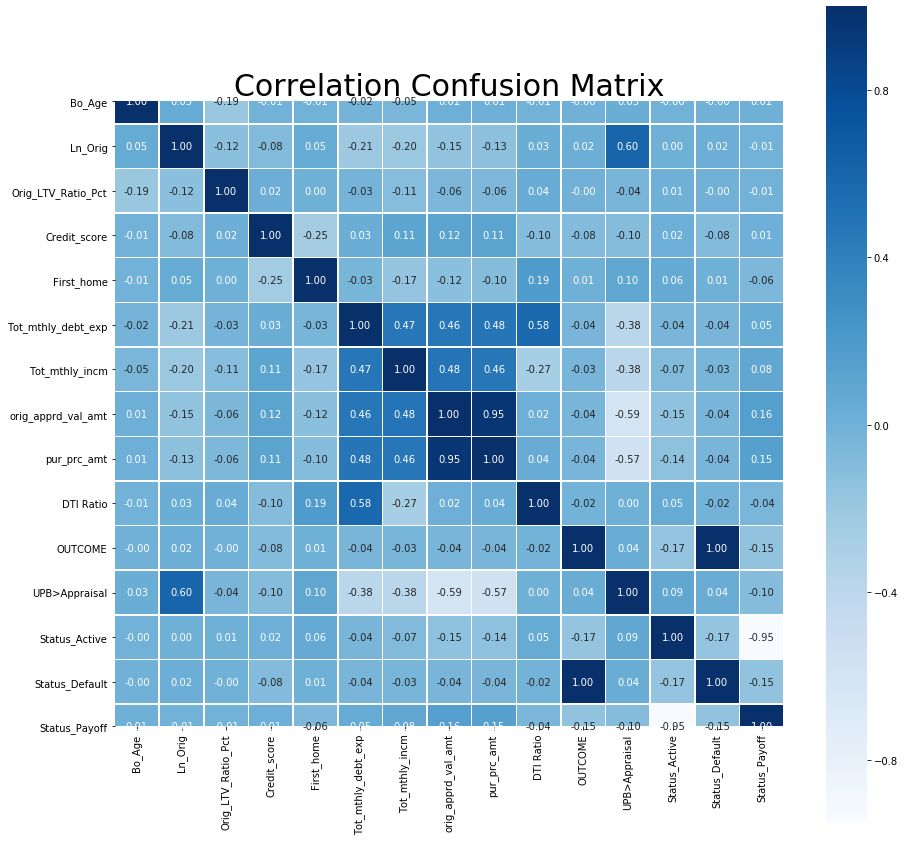

In [16]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,15))
plt.ylabel('Features')
plt.xlabel('Features')

title = 'Correlation Confusion Matrix'
plt.title(title, size = 30)

vis = sns.heatmap(data=cor, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues')
plt.show()

## Train data set

In [17]:
outcome = mort.OUTCOME

mort.drop(['OUTCOME'], axis='columns', inplace=True)
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,169000,160000,0.284500,40171,0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,310000,309000,0.000000,44228,1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,177000,176450,0.377500,49894,0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,113000,110000,0.489616,43217,0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,103000,0.690589,57352,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,80000,0.397920,42590,1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,109000,108000,0.432124,45787,0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,154000,0.465606,43217,0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,92000,0.545600,40171,1,1.0,0.0,0.0


In [18]:
del mort['orig_apprd_val_amt']
mort

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,pur_prc_amt,DTI Ratio,Median_state_inc,UPB>Appraisal,Status_Active,Status_Default,Status_Payoff
0,37,75650.0,85,669,0,1707,6000,160000,0.284500,40171,0,1.0,0.0,0.0
1,46,390775.0,102,684,0,0,5025,309000,0.000000,44228,1,0.0,0.0,1.0
2,30,112500.0,90,662,1,1812,4800,176450,0.377500,49894,0,0.0,0.0,1.0
3,24,85250.0,97,647,0,3395,6934,110000,0.489616,43217,0,0.0,0.0,1.0
4,35,114000.0,100,791,0,3801,5504,103000,0.690589,57352,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,0.397920,42590,1,0.0,0.0,1.0
10603,30,57000.0,94,589,0,1703,3941,108000,0.432124,45787,0,0.0,0.0,1.0
10604,33,153200.0,95,675,1,1726,3707,154000,0.465606,43217,0,0.0,0.0,1.0
10605,38,158850.0,100,786,1,1364,2500,92000,0.545600,40171,1,1.0,0.0,0.0


In [19]:
X, Y = mort, outcome
## training data와 test data 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
## Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [21]:
## train
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
pred = knn.predict(X_test)

In [23]:
# mean accuracy
knn.score(X_test,Y_test)

0.9754948162111216

## Visualization

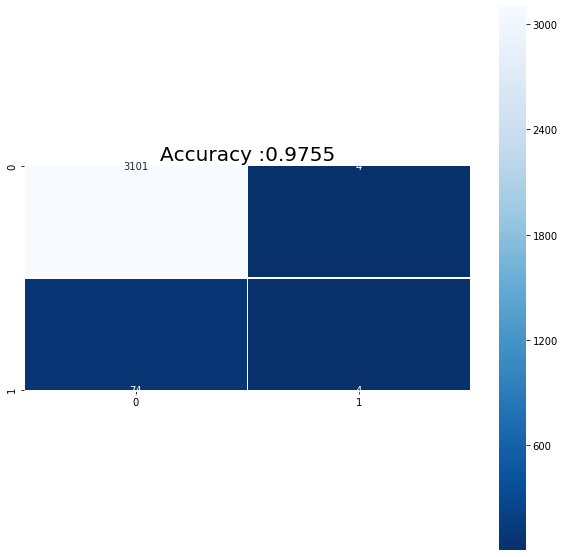

In [24]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, pred)

plt.figure(figsize=(10,10))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

title = 'Accuracy :{0:.6f}'.format(accuracy_score(Y_test, pred))
plt.title(title, size = 20)

ax = sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True, cmap='Blues_r')